In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression 
from scipy import optimize
import imageio
import os
from mpl_toolkits import mplot3d

# Question 1

In [ ]:
def normalEquationMethod(x,y):
    xtx_inverse = np.linalg.pinv(np.matmul(x.T,x))                  # (X'X)^-1
    theta = np.matmul(np.matmul(xtx_inverse,x.T),np.transpose(y))   # ((X'X)^-1)X'y
    return theta

def polynomialRegression(X,y):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    theta = lin_reg.coef_
    theta[0] = lin_reg.intercept_
    return theta

def driverFunction(p,x,y,df_ans):
    X = [x**(i) for i in range(p+1)]
    X = np.array(X).reshape(p+1, y.shape[0]).transpose()
    
    ans_NE = normalEquationMethod(X,y)
    df_ans.append(ans_NE)
    y_hat_NE.append(np.matmul(X,np.transpose(ans_NE)))
    print(f'RMSE for p={p} Normal Equation: {np.sqrt(mse(y,y_hat_NE[-1]))}')
    
    ans_LR = polynomialRegression(X,y)
    df_ans.append(ans_LR)
    y_hat_LR.append(np.matmul(X,np.transpose(ans_LR)))
    print(f'RMSE for p={p} Linear Regression: {np.sqrt(mse(y,y_hat_LR[-1]))}')
    
    plt.plot(x,np.abs(y-y_hat_NE[-1]),'cyan')
    plt.plot(x,np.abs(y-y_hat_LR[-1]),'r--')
    plt.grid()
    plt.xlabel('x',fontsize=12)
    plt.ylabel('|y - y_hat|',fontsize=12)
    plt.title(f'Polynomial Regression p = {p}',fontsize=12)
    plt.legend(['NE', 'LR'])
    plt.show()


In [ ]:
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
theta0 = np.random.randn()
real_theta = [(-1 + theta0)*1e5, -300, 8, -100, 3, 1]
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + theta0*1e5

df_ans = []; y_hat_NE = []; y_hat_LR= []
df_ans.append([i for i in range(6)])
df_ans.append(real_theta)

In [ ]:
driverFunction(4,x,y,df_ans)

In [ ]:
driverFunction(5,x,y,df_ans)

In [ ]:
ans = pd.DataFrame(df_ans).T
ans.columns= ['Degree','Real θ','NE p=4','LR p=4', 'NE p=5' ,'LR p=5']
ans

# Question 2

In [ ]:
# Q2A
def L(theta):
    return theta*theta

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot = [startingVal]    
    for i in range(iterations - 1):
        gradientPlot.append(gradientPlot[-1] - alpha*2*gradientPlot[-1]);
    gradientPlot = np.asarray(gradientPlot)
    return gradientPlot

def driverFunc(alpha,iterations):
    theta = np.arange(-10,10,0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iterPlot = gradientDescent(iterations,alpha,10)
    print('Minimum value of L(θ) is', round(L(iterPlot[-1])), ' at θ = ', round(iterPlot[-1]))
    plt.figure()
    plt.plot(theta, L_theta, 'cyan', linewidth=3)
    plt.scatter(iterPlot,L(iterPlot),c='red')
    plt.grid()
    plt.show()

driverFunc(0.1,100)
driverFunc(0.01,100)
driverFunc(0.01,1000)

Minimum value of L(θ1, θ2) is 0.0  at θ1 =  0.0  at θ2 =  0.0


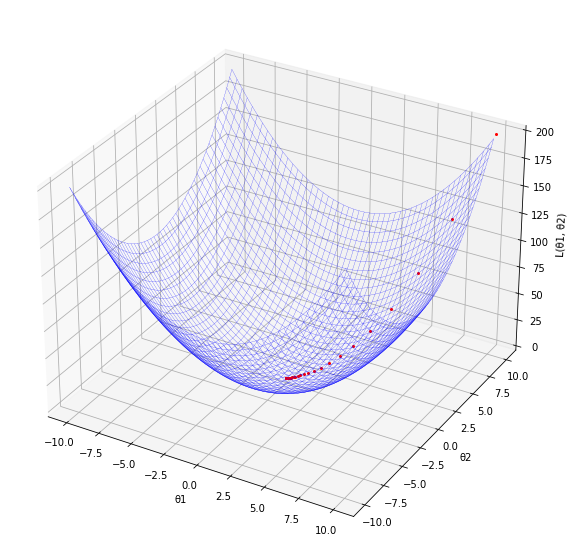

Minimum value of L(θ1, θ2) is 4.0  at θ1 =  1.0  at θ2 =  1.0


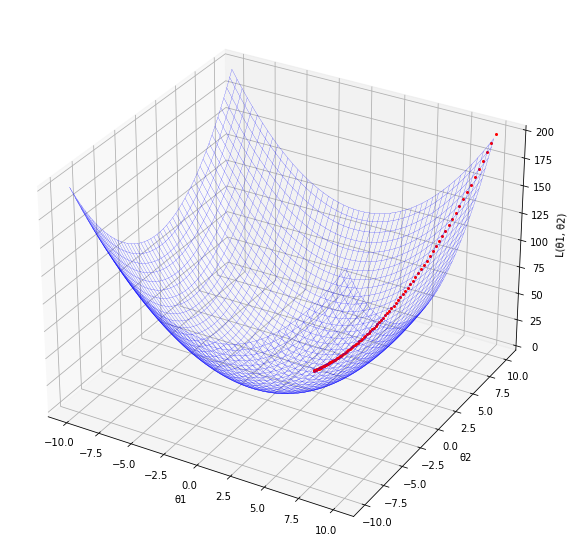

Minimum value of L(θ1, θ2) is 0.0  at θ1 =  0.0  at θ2 =  0.0


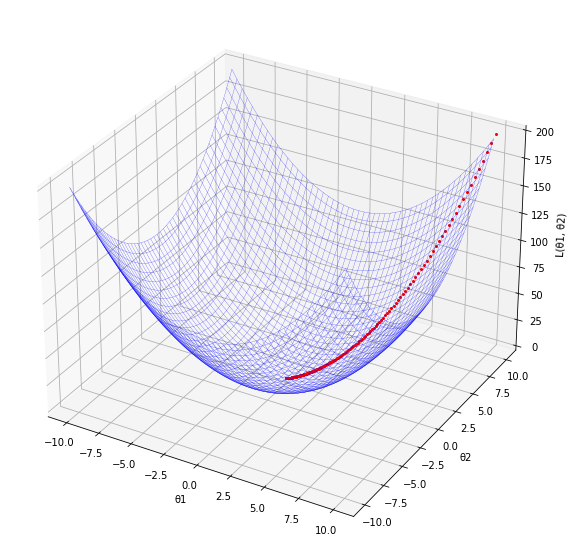

In [3]:
# Q2b
def L(theta1, theta2):
    return theta1*theta1 + theta2*theta2

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*2*gradientPlot1[-1])
        gradientPlot2.append(gradientPlot2[-1] - alpha*2*gradientPlot2[-1])

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):
    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    # ans1,ans2  = gradientDescent(1000,0.01,10)
    ans1,ans2  = gradientDescent(iterations,alpha,10)

    L_theta1_theta2 = np.zeros((len(theta1),len(theta2)))
    for i in range(len(theta1)):
        for j in range(len(theta2)):
            L_theta1_theta2[i][j] = L(theta1[i], theta2[j])

    print('Minimum value of L(θ1, θ2) is', round(L(ans1[-1],ans2[-1])),' at θ1 = ', round(ans1[-1]),' at θ2 = ', round(ans2[-1]))

    x, y = np.meshgrid(theta1, theta2)
    z = L(x, y)

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(x, y, z, color='blue', linewidth=0.2)

    for i in range(len(ans1)):
        ax.plot(ans1[i], ans2[i], L(ans1[i],ans2[i]), 'ro', markersize=2)
    ax.set_xlabel('θ1')
    ax.set_ylabel('θ2')
    ax.set_zlabel('L(θ1, θ2)')
    plt.show()

driverFunc(0.1,100)
driverFunc(0.01,100)
driverFunc(0.01,1000)


Minimum value of L(θ) is 0.0  at θ =  1.0


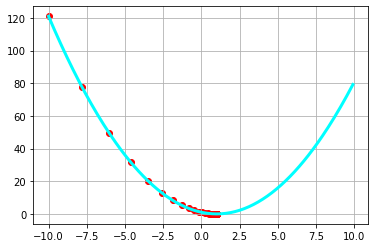

Minimum value of L(θ) is 2.0  at θ =  -0.0


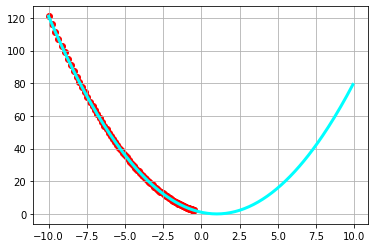

Minimum value of L(θ) is 0.0  at θ =  1.0


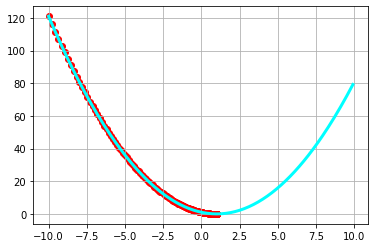

In [4]:
# Q2C
def L(theta):
    return (theta-1)**2


def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot = [startingVal]    
    for i in range(iterations - 1):
        gradientPlot.append(gradientPlot[-1] - alpha*2*(gradientPlot[-1]-1))
    gradientPlot = np.asarray(gradientPlot)
    return gradientPlot

def driverFunc(alpha,iterations):
    theta = np.arange(-10,10,0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iterPlot = gradientDescent(iterations,alpha,-10)
    print('Minimum value of L(θ) is', round(L(iterPlot[-1])), ' at θ = ', round(iterPlot[-1]))
    plt.figure()
    plt.plot(theta, L_theta, 'cyan', linewidth=3)
    plt.scatter(iterPlot,L(iterPlot),c='red')
    plt.grid()
    plt.show()

driverFunc(0.1,100)
driverFunc(0.01,100)
driverFunc(0.01,1000)



Minimum value of L(θ1, θ2) is 0.0  at θ1 =  1.0  at θ2 =  1.0


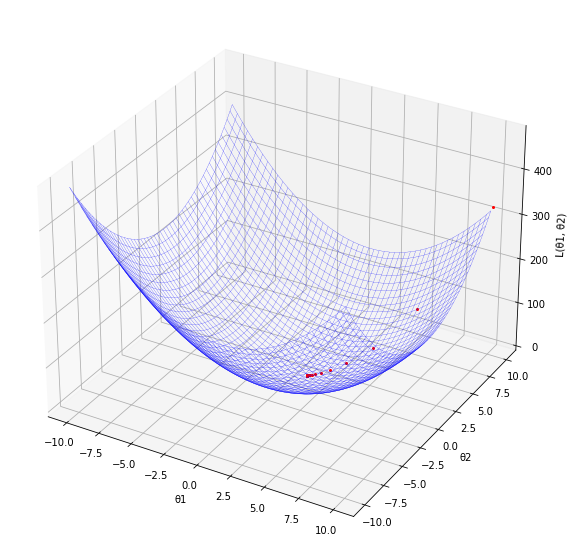

Minimum value of L(θ1, θ2) is 6.0  at θ1 =  2.0  at θ2 =  2.0


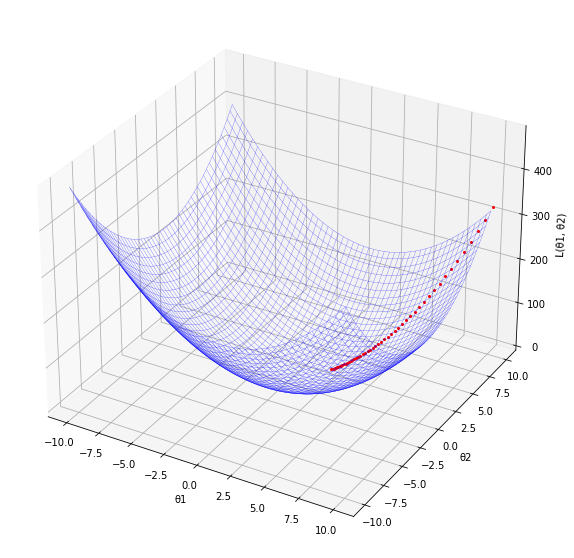

Minimum value of L(θ1, θ2) is 0.0  at θ1 =  1.0  at θ2 =  1.0


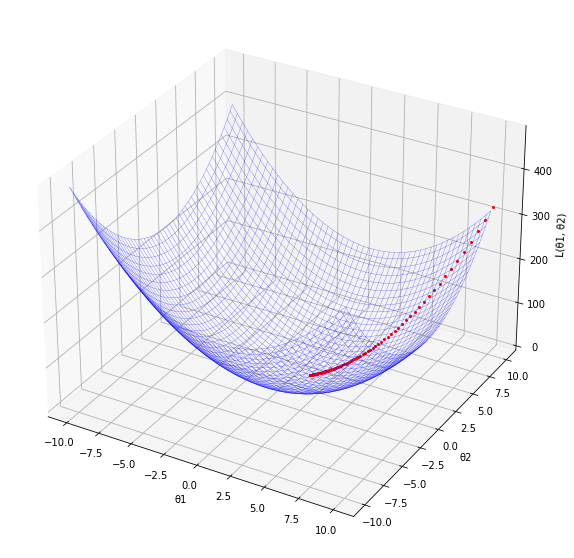

In [5]:
# Q2D
def L(theta1, theta2):
    return 2*((theta1-1)**2 + (theta2-1)**2)

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*4*(gradientPlot1[-1]-1))
        gradientPlot2.append(gradientPlot2[-1] - alpha*4*(gradientPlot2[-1]-1))

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):

    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    ans1,ans2  = gradientDescent(iterations,alpha,10)

    L_theta1_theta2 = np.zeros((len(theta1),len(theta2)))
    for i in range(len(theta1)):
        for j in range(len(theta2)):
            L_theta1_theta2[i][j] = L(theta1[i], theta2[j])

    print('Minimum value of L(θ1, θ2) is', round(L(ans1[-1],ans2[-1])),' at θ1 = ', round(ans1[-1]),' at θ2 = ', round(ans2[-1]))

    x, y = np.meshgrid(theta1, theta2)
    z = L(x, y)

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(x, y, z, color='blue', linewidth=0.2)

    for i in range(len(ans1)):
        ax.plot(ans1[i], ans2[i], L(ans1[i],ans2[i]), 'ro', markersize=2)
    ax.set_xlabel('θ1')
    ax.set_ylabel('θ2')
    ax.set_zlabel('L(θ1, θ2)')
    plt.show()

driverFunc(0.1,50)
driverFunc(0.01,50)
driverFunc(0.01,100)

In [6]:
# Q2E

def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    return np.sum(y - (theta_0 + (theta_1*x)))

def derivativeFunc2(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + x[i]*(y[i] - (theta_0 + theta_1 * x[i] ))
    return ans 


def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y):
    
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(x,y,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(x,y,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):

    theta0 = np.arange(-50,50,0.5)
    theta1 = np.arange(-1,1,0.01)
    L_theta0_theta1 = np.zeros((len(theta1),len(theta0)))
    data = pd.read_excel('data.xlsx')
    X = data.x
    Y= data.y


    for i in range(len(theta1)):
        for j in range(len(theta0)):
            L_theta0_theta1[i][j] = L(data.x, data.y, theta0[j], theta1[i])


    ans1,ans2  = gradientDescent(iterations,alpha,50,0,X, Y)
    # print(ans1,ans2)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

    # x, y = np.meshgrid(theta0, theta1)
    # z = L_theta0_theta1

    # fig = plt.figure(figsize=(10, 10))
    # ax = plt.axes(projection='3d')
    # ax.plot_wireframe(x, y, z, color='blue', linewidth=0.2)

    # for i in range(len(ans1)):
    #     ax.plot(ans1[i], ans2[i], L(data.x,data.y,ans1[i],ans2[i]), 'ro', markersize=2)


    # ax.set_xlabel('θ0')
    # ax.set_ylabel('θ1')
    # ax.set_zlabel('L(θ0, θ1)')
    # plt.show()

driverFunc(1e-11,1000)
driverFunc(1e-12,1000)
driverFunc(1e-12,5000)


Minimum value of L(θ1, θ2) is 1576.3391560950045  at θ1 =  49.999997117838255  at θ2 =  -0.008851835542843913
Minimum value of L(θ1, θ2) is 3588.012370125311  at θ1 =  49.99999767923025  at θ2 =  -0.007344317765876041
Minimum value of L(θ1, θ2) is 1576.3405601331215  at θ1 =  49.999997166533326  at θ2 =  -0.0088505764975341


# Question 3

In [7]:
# Q3

def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + (y[i] - (theta_0 + theta_1 * x[i] ) )
    return ans 

def derivativeFunc2(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + x[i]*(y[i] - (theta_0 + theta_1 * x[i] ) )
    return ans 


def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y,k):
    
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     
    # k = 5
    for i in range(iterations - 1):
        tempIndex = np.random.randint(0,len(x),k)
        tempX = []
        tempY = []
        for j in tempIndex:
            tempX.append(x[j])
            tempY.append(y[j])
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)


def driverFunc(alpha,iterations,k):

    theta0 = np.arange(-50,50,0.5)
    theta1 = np.arange(-1,1,0.01)
    data = pd.read_excel('data.xlsx')
    ans1,ans2  = gradientDescent(iterations,alpha,50,0,data.x, data.y,k)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(1e-11,10000,5)
driverFunc(1e-12,10000,5)
driverFunc(1e-12,60000,5)
driverFunc(1e-11,50000,1)
driverFunc(1e-12,500000,1)




Minimum value of L(θ1, θ2) is 1576.371831709389  at θ1 =  49.99999716839188  at θ2 =  -0.008845760068683746
Minimum value of L(θ1, θ2) is 12224.423922744854  at θ1 =  49.99999829710114  at θ2 =  -0.00538351278513127
Minimum value of L(θ1, θ2) is 1577.2335008275948  at θ1 =  49.99999719454739  at θ2 =  -0.008820049705262562
Minimum value of L(θ1, θ2) is 1576.643512332893  at θ1 =  49.99999718562314  at θ2 =  -0.008833292956545427
Minimum value of L(θ1, θ2) is 1576.3392431812879  at θ1 =  49.999997165667565  at θ2 =  -0.008852148538771165


# Question 4

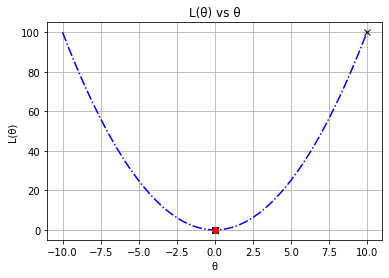

In [8]:
#Question 4A

def calculateL(theta):
    return np.square(theta)

def gradL(theta):
    return 2*theta

theta_plot = np.arange(-10,10.001,0.1)
values = calculateL(theta_plot)
iterations = 100

alpha = [0.1]
theta = [10]
for i in range(iterations-1):
    def L_alpha(alpha):
        return calculateL(theta[-1] - alpha*gradL(theta[-1]))
    alpha.append(optimize.golden(L_alpha))
    theta.append(theta[-1] - alpha[-1]*gradL(theta[-1]))
theta = np.asarray(theta)
L = np.square(theta)

plt.plot(theta_plot, values, 'b-.')
plt.plot(theta, calculateL(theta), 'kx')
plt.plot(theta[-1], L[-1], 'ro')
plt.title("L(θ) vs θ")
plt.xlabel('θ')
plt.ylabel('L(θ)')
plt.grid()
plt.show()

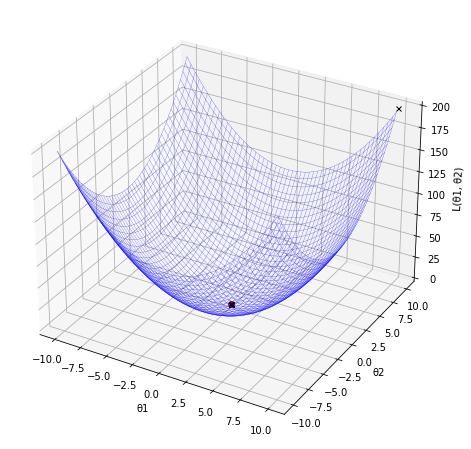

In [9]:
#Question 4B

def calculateL(theta1, theta2):
    return np.square(theta1) + np.square(theta2)

alpha1 = [0.1]
alpha2 = [0.1]
theta1 = [10]
theta2 = [10]
iterations = 100
    
for i in range(iterations - 1):
    theta = np.array([[theta1[i]],[theta2[i]]])
    grad_L = np.array([[2*theta1[i]], [2*theta2[i]]])
    alpha1.append(alpha1[-1] - (2*alpha1[-1]-1)/2)
    alpha2.append(alpha2[-1] - (2*alpha2[-1]-1)/2)
    theta = theta - np.dot(alpha[-1], grad_L)
    theta1.append(theta1[-1] - 2*alpha1[-1]*theta1[-1])
    theta2.append(theta2[-1] - 2*alpha2[-1]*theta2[-1])
    
x, y = np.meshgrid(np.arange(-10,10,0.1), np.arange(-10,10,0.1))
z = calculateL(x, y)

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='b', linewidth=0.2)
ax.plot(theta1[-1], theta2[-1], calculateL(theta1[-1], theta2[-1]), 'ro')
ax.plot(theta1, theta2, calculateL(theta1, theta2), 'kx', markersize=5)
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('L(θ1, θ2)')
plt.show()    

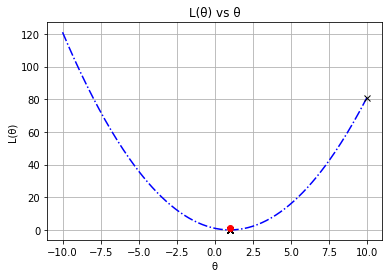

In [10]:
#Question 4C

def calculateL(theta):
    return np.square(theta-1)

def gradL(theta):
    return 2*theta

theta_plot = np.arange(-10,10.001,0.1)
values = calculateL(theta_plot)
iterations = 100

alpha = [0.1]
theta = [10]
for i in range(iterations-1):
    def L_alpha(alpha):
        return calculateL(theta[-1] - alpha*gradL(theta[-1]))
    alpha.append(optimize.golden(L_alpha))
    theta.append(theta[-1] - alpha[-1]*gradL(theta[-1]))
theta = np.asarray(theta)
L = np.square(theta)

plt.plot(theta_plot, values, 'b-.')
plt.plot(theta, calculateL(theta), 'kx')
plt.plot(theta[-1], L[-1], 'ro')
plt.title("L(θ) vs θ")
plt.xlabel('θ')
plt.ylabel('L(θ)')
plt.grid()
plt.show()

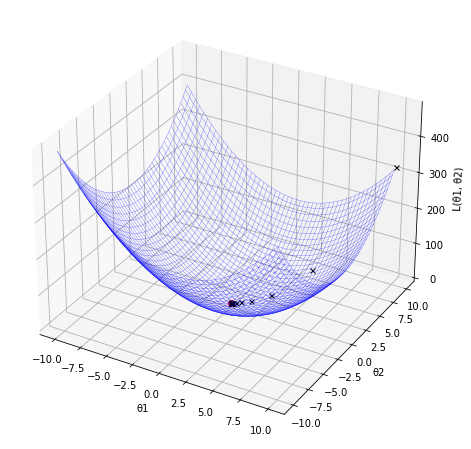

In [11]:
#Question 4D

def calculateL(theta1, theta2):
    return 2*np.square(theta1-np.ones(np.array(theta1).shape)) + 2*np.square(theta2-np.ones(np.array(theta2).shape))

alpha1 = [0.1]
alpha2 = [0.1]
theta1 = [10]
theta2 = [10]
iterations = 100
    
for i in range(iterations - 1):
    theta = np.array([[theta1[i]],[theta2[i]]])
    grad_L = np.array([[4*theta1[i]], [4*theta2[i]]])
    alpha1.append(alpha1[-1] - (4*alpha1[-1]-1)/4)
    alpha2.append(alpha2[-1] - (4*alpha2[-1]-1)/4)
    theta = theta - np.dot(alpha[-1], grad_L)
    theta1.append(theta1[-1] - 2*alpha1[-1]*theta1[-1])
    theta2.append(theta2[-1] - 2*alpha2[-1]*theta2[-1])
    
x, y = np.meshgrid(np.arange(-10,10,0.1), np.arange(-10,10,0.1))
z = calculateL(x, y)

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='b', linewidth=0.2)
ax.plot(theta1[-1], theta2[-1], calculateL(theta1[-1], theta2[-1]), 'ro')
ax.plot(theta1, theta2, calculateL(theta1, theta2), 'kx', markersize=5)
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('L(θ1, θ2)')
plt.show()    

In [12]:
#Question 4E

def calculateL(x, y, theta1, theta2):
    return np.sum(np.square(y - (theta1 + (theta2*x))))

def gradL1(data_x, data_y, theta1, theta2):
    return np.sum(-2*(data_y-theta1-data_x*theta2))

def gradL2(data_x, data_y, theta1, theta2):
    return np.sum(-2*data_x*(data_y-theta1-data_x*theta2))

data = pd.read_excel('data.xlsx')
data_x = np.reshape(np.array(data.x), (-1, 1))
data_y = np.reshape(np.array(data.y), (-1, 1))

iterations = 10
theta = [np.array([-50, -1])]
L = lambda theta: np.sum(np.square(data_y - (theta[0] + (theta[1]*data_x))))

for i in range(iterations-1):
    gradL = np.array([gradL1(data_x, data_y, theta[-1][0], theta[-1][1]), gradL2(data_x, data_y, theta[-1][0], theta[-1][1])])
    H = nd.Hessian(L)([theta[-1][0], theta[-1][1]])
    theta.append(theta[-1]-np.dot(np.linalg.inv(H), gradL))

theta1 = np.arange(-50,50,0.05)
theta2 = np.arange(-1,1,0.001)
L = np.zeros((len(theta2),len(theta1)))

x, y = np.meshgrid(theta1, theta2)
for i in range(len(theta2)):
    for j in range(len(theta1)):
        L[i][j] = calculateL(data_x, data_y, theta1[j], theta2[i])
z = L

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='b', linewidth=0.2)
ax.plot(theta[-1][0], theta[-1][1], calculateL(data_x, data_y, theta[-1][0], theta[-1][1]), 'ro')
ax.plot([theta[i][0] for i in range(len(theta))], [theta[i][1] for i in range(len(theta))], calculateL(data_x, data_y, [theta[i][0] for i in range(len(theta))], [theta[i][1] for i in range(len(theta))]), 'kx', markersize=5)
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('L(θ1, θ2)')
plt.show()  

NameError: name 'nd' is not defined

# Question 5

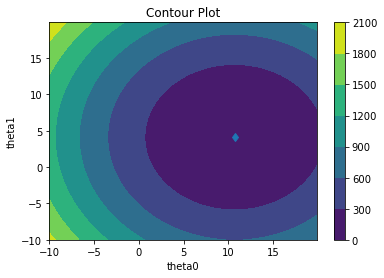

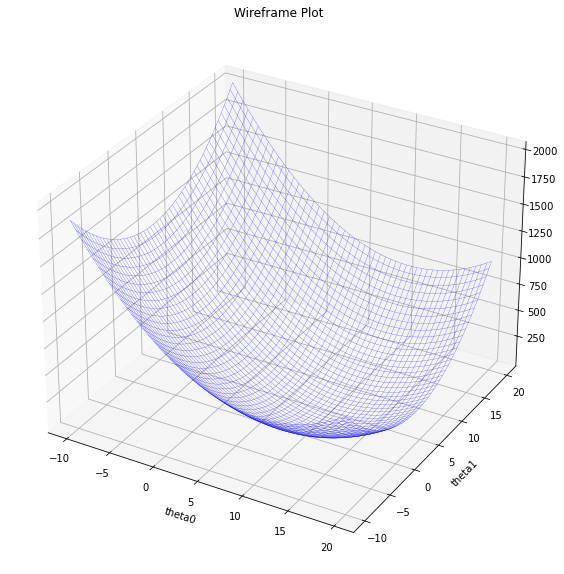

In [13]:
# 5a
x = np.array([[1],[3],[6]])
y = np.array(([6],[10],[16]))
mu = np.mean(x)
sig = np.std(x)
x = (x - mu)/sig
theta0 = np.arange(-10,20,0.1)
theta1 = np.arange(-10,20,0.1)
xx, yy = np.meshgrid(theta0, theta1)
L = np.zeros((np.size(theta1),np.size(theta0)))
for i in range(np.size(theta1)):
    for j in range(np.size(theta0)):
        L[i][j] = np.sum(np.square(y - (theta0[j] + (theta1[i]*x))))
minima = np.argwhere(L == np.min(L))
plt.contourf(xx, yy,L)
plt.colorbar()
plt.plot(theta0[minima[0,1]],theta1[minima[0,0]],'d')
plt.title('Contour Plot')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xx, yy, L, color='blue', linewidth=0.2)
plt.title('Wireframe Plot')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

the value of theta is: [[10.12986507]
 [ 3.74312252]]


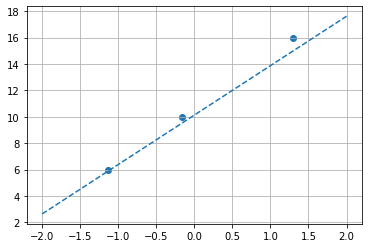

In [15]:
#5b
temp = np.copy(x)
x2 = np.ones((np.size(temp,0),2))
x2[:,1] = temp[:,0]
iterations = 60
alpha = 0.01
theta = np.array([[-10],[-10]])
theta0_vals = [-10]
theta1_vals = [-10]
for i in range(iterations - 1):
 y_hat = np.dot(x2,theta)
 theta = theta - (alpha*2)*np.dot(x2.T,(y_hat - y))
 theta0_vals.append(theta[0,0])
 theta1_vals.append(theta[1,0])
 
print('the value of theta is:',theta)
plt.figure()
axes = plt.gca()
x_val = np.linspace(-2,2,100)
y_val = theta[0,0] + theta[1,0] * x_val
plt.plot(x_val, y_val, '--')
plt.scatter(x, y)
plt.grid()
plt.plot()
plt.show()
#GIF MAKER
filenames = []
for i in range(iterations):
 # plot the line chart
 plt.contourf(xx, yy,L)
 plt.colorbar()
 for j in range(i+1):
  plt.plot(theta0_vals[j],theta1_vals[j],'ro')
 plt.title('Contour Plot')
 plt.xlabel('theta0')
 plt.ylabel('theta1')
 
 # create file name and append it to a list
 filename = f'{i}.png'
 filenames.append(filename)
 
 # save frame
 plt.savefig(filename)
 plt.close()# build gif
 
with imageio.get_writer('Ques5.gif', mode='I') as writer:
 for filename in filenames:
   image = imageio.imread(filename)
   writer.append_data(image)
 
# Remove files
for filename in set(filenames):
 os.remove(filename)
